<h5 style="color:#616D7E">Mohammad Sadegh Aghili &nbsp&nbsp&nbsp&nbsp&nbsp&nbsp 810100274</h5>

# CA4

In [220]:
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split

In [165]:
file_path = 'marketing_campaign.csv'
df = pd.read_csv(file_path)

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2240 non-null   int64  
 1   ID                 2240 non-null   int64  
 2   Year_Birth         2240 non-null   int64  
 3   Education          2240 non-null   object 
 4   Marital_Status     2240 non-null   object 
 5   Income             2017 non-null   float64
 6   Kidhome            2240 non-null   int64  
 7   Teenhome           2240 non-null   int64  
 8   Dt_Customer        2240 non-null   object 
 9   Recency            2240 non-null   int64  
 10  MntCoffee          2035 non-null   float64
 11  MntFruits          2240 non-null   int64  
 12  MntMeatProducts    2240 non-null   int64  
 13  MntFishProducts    2240 non-null   int64  
 14  MntSweetProducts   2240 non-null   int64  
 15  MntGoldProds       2227 non-null   float64
 16  NumWebVisitsMonth  2040 

In [167]:
df.describe()

Unnamed: 0            ID   Year_Birth         Income      Kidhome  \
count  2240.000000   2240.000000  2240.000000    2017.000000  2240.000000   
mean   1119.500000   5592.159821  1968.805804   52297.080317     0.437946   
std     646.776623   3246.662198    11.984069   25543.108215     0.563666   
min       0.000000      0.000000  1893.000000    2447.000000    -5.000000   
25%     559.750000   2828.250000  1959.000000   35340.000000     0.000000   
50%    1119.500000   5458.500000  1970.000000   51369.000000     0.000000   
75%    1679.250000   8427.750000  1977.000000   68316.000000     1.000000   
max    2239.000000  11191.000000  1996.000000  666666.000000     2.000000   

          Teenhome      Recency    MntCoffee    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2035.000000  2240.000000      2240.000000   
mean      0.506250    49.109375   304.239312    26.302232       166.950000   
std       0.544538    28.962453   337.515534    39.773434       225.715373   
min       0.000000     0.000000     0.000000     0.000000         0.000000   
25%       0.000000    24.000000    23.000000     1.000000        16.000000   
50%       0.000000    49.000000   177.000000     8.000000        67.000000   
75%       1.000000    74.000000   505.000000    33.000000       232.000000   
max       2.000000    99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumWebVisitsMonth  \
count      2240.000000       2240.000000   2227.000000        2040.000000   
mean         37.525446         27.062946     43.847777           5.326961   
std          54.628979         41.280498     51.897098           2.439349   
min           0.000000          0.000000      0.000000           0.000000   
25%           3.000000          1.000000      9.000000           3.000000   
50%          12.000000          8.000000     24.000000           6.000000   
75%          50.000000         33.000000     56.000000           7.000000   
max         259.000000        263.000000    362.000000          20.000000   

          Complain  NumPurchases  UsedCampaignOffer  
count  2240.000000   2240.000000        2240.000000  
mean      0.009375     14.862054           0.271875  
std       0.096391      7.677173           0.445025  
min       0.000000      0.000000           0.000000  
25%       0.000000      8.000000           0.000000  
50%       0.000000     15.000000           0.000000  
75%       0.000000     21.000000           1.000000  
max       1.000000     44.000000           1.000000

In [168]:
missing_values = df.isnull().sum()
missing_proportion = df.isnull().mean()

missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Proportion': missing_proportion
})

print(missing_info)

                   Missing Values  Missing Proportion
Unnamed: 0                      0            0.000000
ID                              0            0.000000
Year_Birth                      0            0.000000
Education                       0            0.000000
Marital_Status                  0            0.000000
Income                        223            0.099554
Kidhome                         0            0.000000
Teenhome                        0            0.000000
Dt_Customer                     0            0.000000
Recency                         0            0.000000
MntCoffee                     205            0.091518
MntFruits                       0            0.000000
MntMeatProducts                 0            0.000000
MntFishProducts                 0            0.000000
MntSweetProducts                0            0.000000
MntGoldProds                   13            0.005804
NumWebVisitsMonth             200            0.089286
Complain                    

In [169]:
df.nunique()

Unnamed: 0           2240
ID                   2240
Year_Birth             59
Education               5
Marital_Status          8
Income               1810
Kidhome                 5
Teenhome                3
Dt_Customer           663
Recency               100
MntCoffee             747
MntFruits             158
MntMeatProducts       558
MntFishProducts       182
MntSweetProducts      177
MntGoldProds          212
NumWebVisitsMonth      15
Complain                2
NumPurchases           39
UsedCampaignOffer       2
dtype: int64

In [170]:
def replace(your_column):
    unique_values = df[your_column].unique()
    print(unique_values)
    your_mapping_dict = {value: index + 1 for index, value in enumerate(unique_values)}
    df[your_column] = df[your_column].map(your_mapping_dict).fillna(df[your_column])

columns =  ['Education', 'Marital_Status', 'Dt_Customer']
for column in columns:
    print(column,":")
    replace(column)
    

Education :
['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Marital_Status :
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
Dt_Customer :
['04-09-2012' '08-03-2014' '21-08-2013' '10-02-2014' '19-01-2014'
 '09-09-2013' '13-11-2012' '08-05-2013' '06-06-2013' '13-03-2014'
 '15-11-2013' '10-10-2012' '24-11-2012' '24-12-2012' '31-08-2012'
 '28-03-2013' '03-11-2012' '08-08-2012' '06-01-2013' '23-12-2012'
 '11-01-2014' '18-03-2013' '02-01-2013' '27-05-2013' '20-02-2013'
 '31-05-2013' '22-11-2013' '22-05-2014' '11-05-2013' '29-10-2012'
 '29-08-2013' '31-12-2013' '02-09-2013' '11-02-2014' '01-02-2013'
 '29-04-2013' '12-03-2013' '05-11-2013' '02-10-2013' '28-06-2014'
 '09-11-2012' '24-05-2013' '01-01-2014' '08-11-2012' '12-05-2014'
 '11-08-2012' '07-06-2014' '12-06-2013' '19-11-2012' '02-04-2013'
 '28-04-2014' '17-06-2013' '03-03-2014' '04-07-2013' '07-09-2012'
 '18-02-2013' '11-06-2013' '06-12-2013' '21-05-2013' '11-05-2014'
 '19-03-2014' '27-09-2013' '08-04-2013' '

In [171]:
# # Repalace non numeric values with NaN
# df['Education'] = pd.to_numeric(df['Education'], errors='coerce')
# df['Marital_Status'] = pd.to_numeric(df['Marital_Status'], errors='coerce')
# df['Dt_Customer'] = pd.to_numeric(df['Dt_Customer'], errors='coerce')

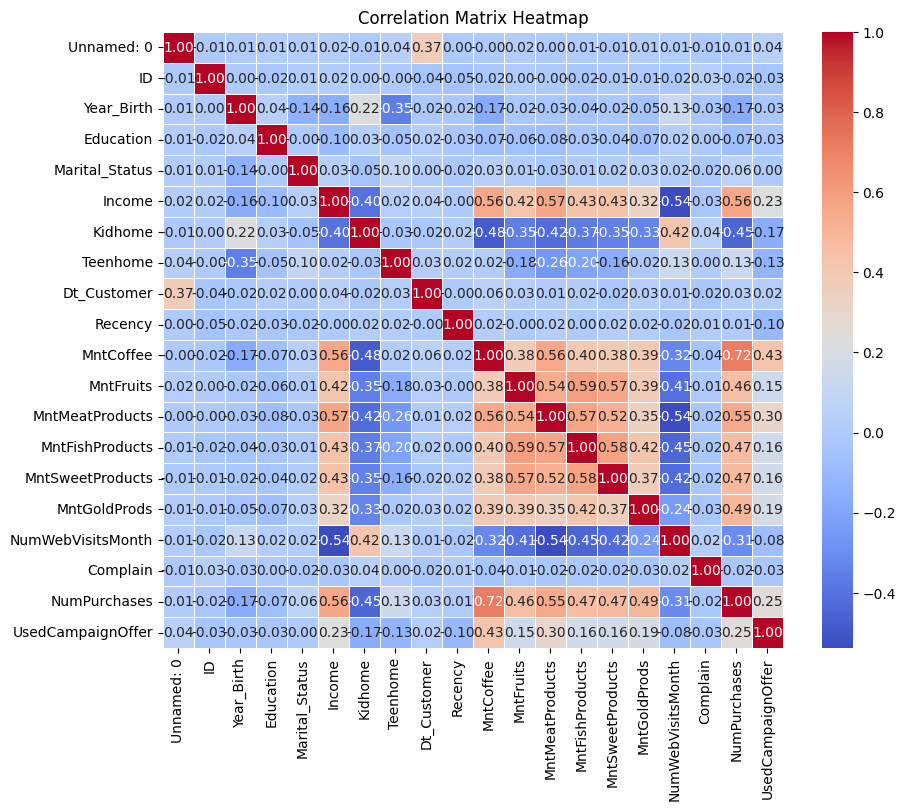

In [172]:
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

Correlation with NumPurchases:
NumPurchases         1.000000
MntCoffee            0.715164
Income               0.562603
MntMeatProducts      0.554229
MntGoldProds         0.493939
MntSweetProducts     0.472876
MntFishProducts      0.469454
MntFruits            0.455461
UsedCampaignOffer    0.251386
Teenhome             0.133163
Marital_Status       0.057129
Dt_Customer          0.031369
Unnamed: 0           0.007169
Recency              0.005740
Complain            -0.020583
ID                  -0.023834
Education           -0.074614
Year_Birth          -0.168304
NumWebVisitsMonth   -0.309666
Kidhome             -0.447073
Name: NumPurchases, dtype: float64


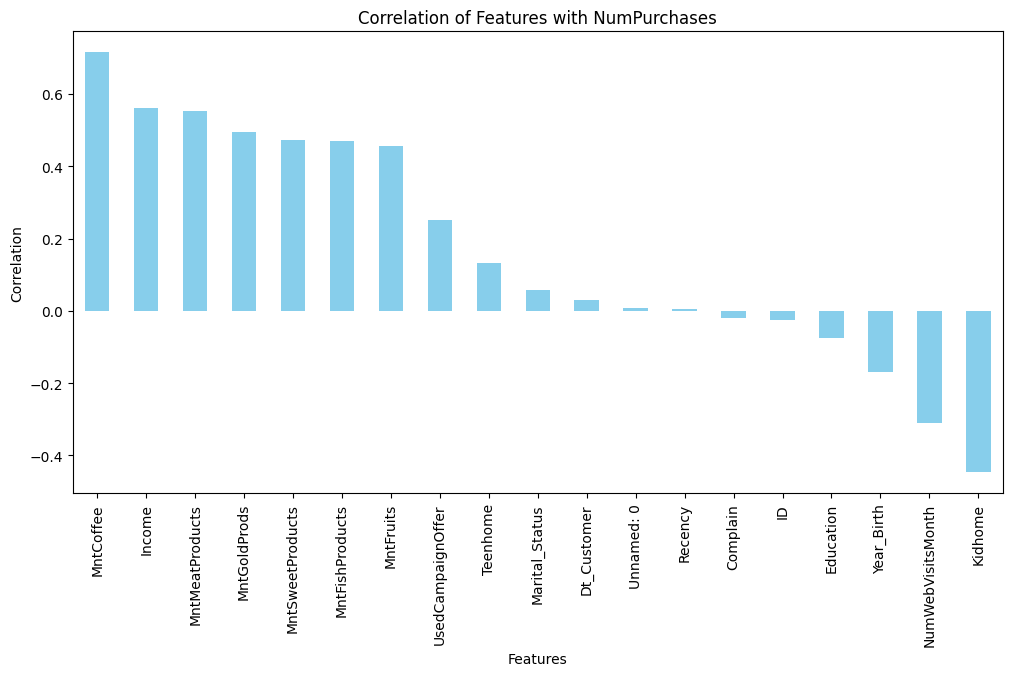

In [173]:
correlation_with_target = df.corr()['NumPurchases'].sort_values(ascending=False)
print("Correlation with NumPurchases:")
print(correlation_with_target)

# Create a bar plot to visualize the correlations
plt.figure(figsize=(12, 6))
correlation_with_target.drop('NumPurchases').plot(kind='bar', color='skyblue')
plt.title('Correlation of Features with NumPurchases')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.show()

In [174]:
header_row = pd.read_csv(file_path, nrows=0)
print(header_row)
# specific_row = df.iloc[0]
# print(specific_row)

Empty DataFrame
Columns: [Unnamed: 0, ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntCoffee, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumWebVisitsMonth, Complain, NumPurchases, UsedCampaignOffer]
Index: []


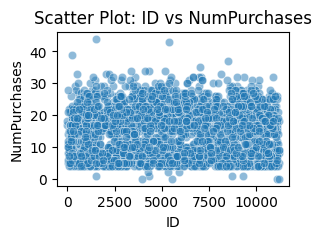

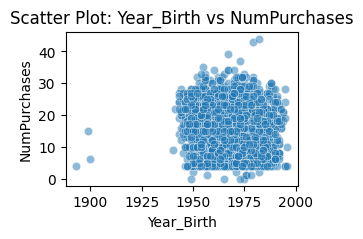

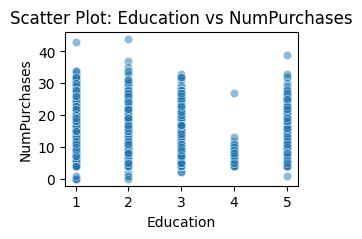

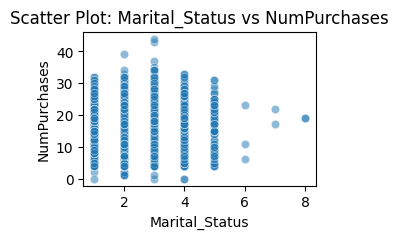

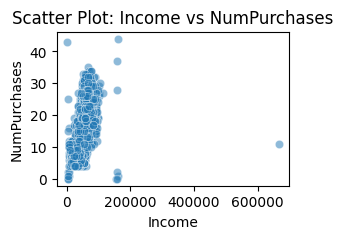

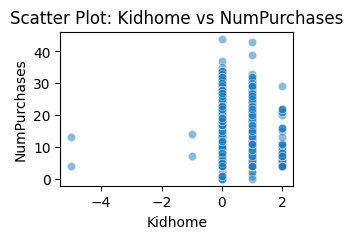

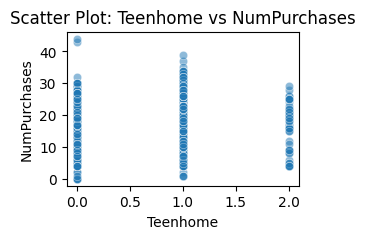

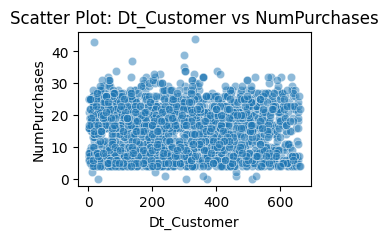

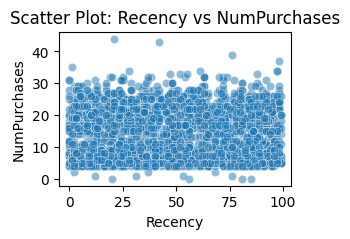

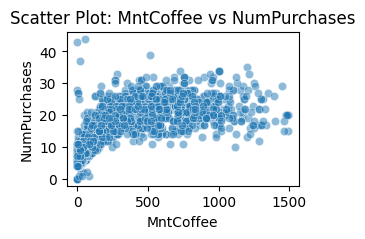

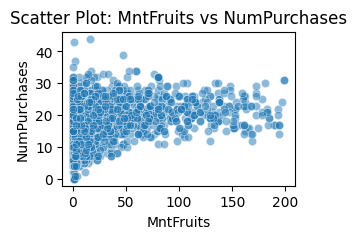

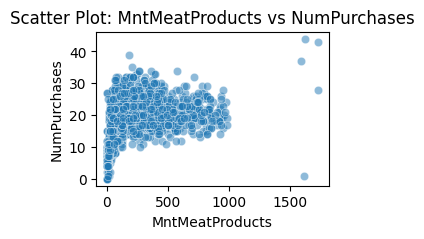

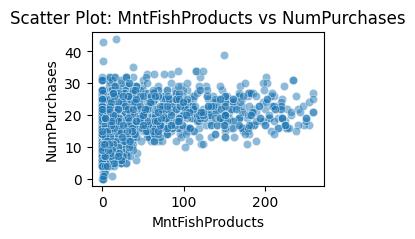

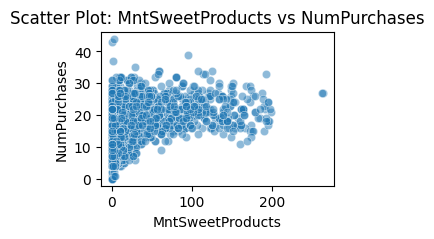

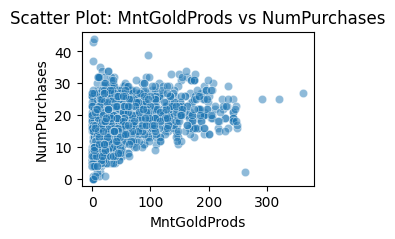

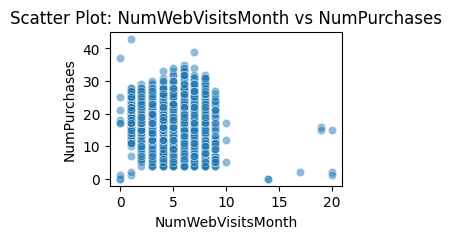

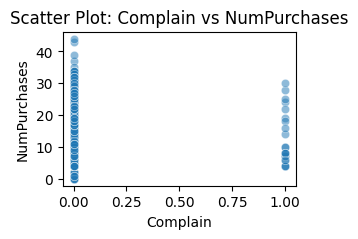

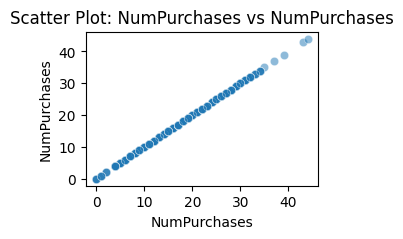

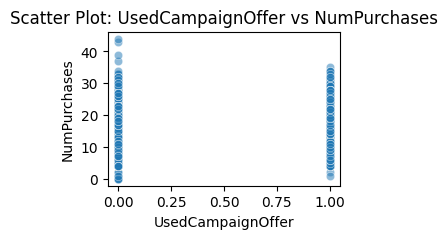

In [175]:
selected_features = ['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntCoffee',
'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumWebVisitsMonth', 'Complain', 'NumPurchases', 'UsedCampaignOffer']

# Create scatter plots
for feature in selected_features:
    plt.figure(figsize=(3, 2))
    sns.scatterplot(x=df[feature], y=df['NumPurchases'], alpha=0.5)
    plt.title(f'Scatter Plot: {feature} vs NumPurchases')
    plt.xlabel(feature)
    plt.ylabel('NumPurchases')
    plt.show()

<Figure size 300x200 with 0 Axes>

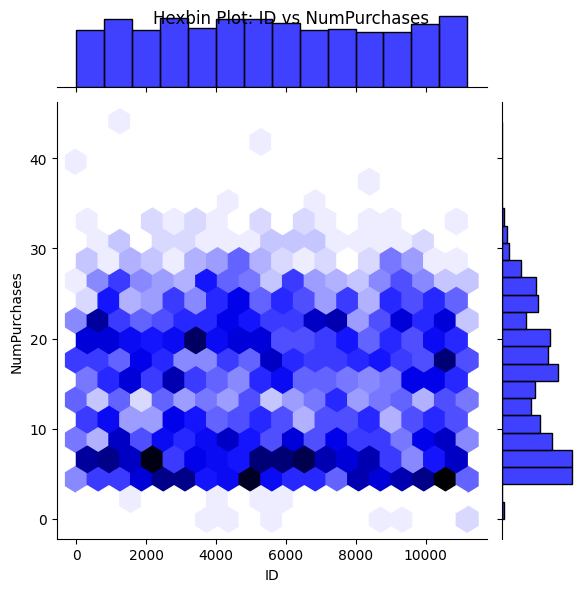

<Figure size 300x200 with 0 Axes>

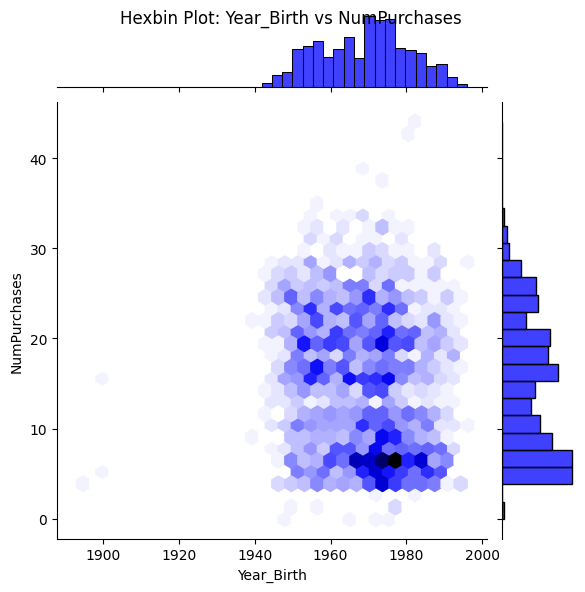

<Figure size 300x200 with 0 Axes>

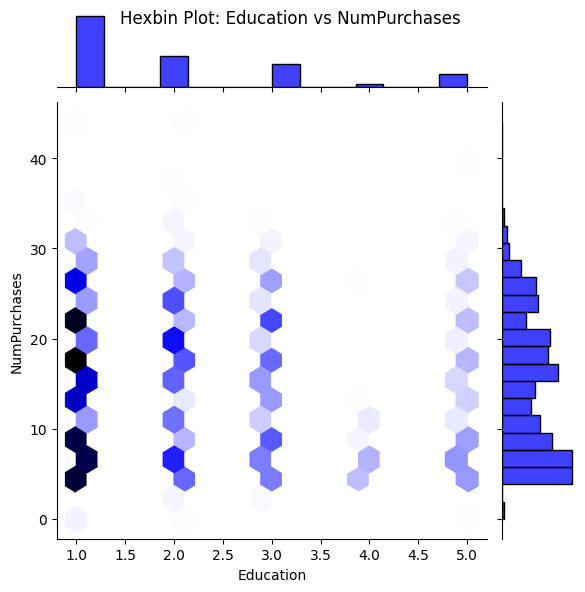

<Figure size 300x200 with 0 Axes>

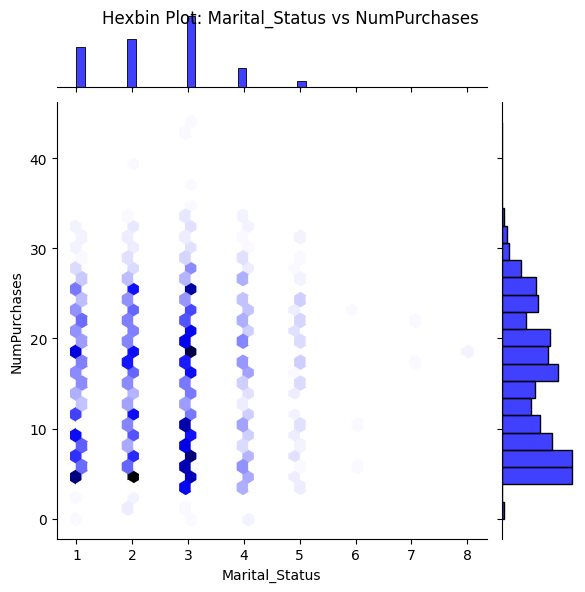

<Figure size 300x200 with 0 Axes>

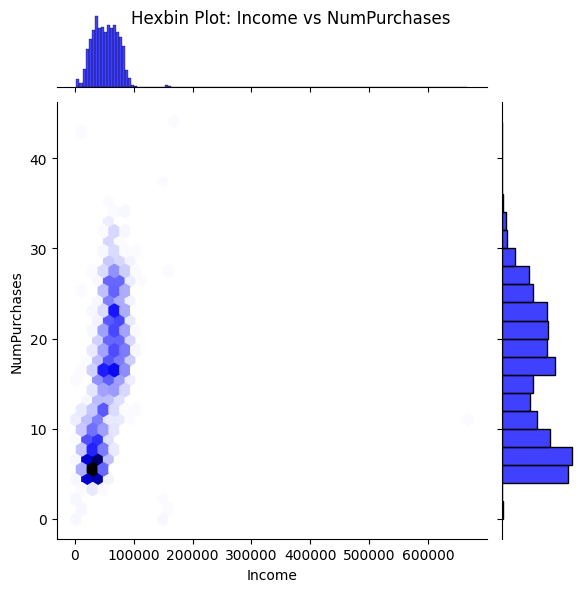

<Figure size 300x200 with 0 Axes>

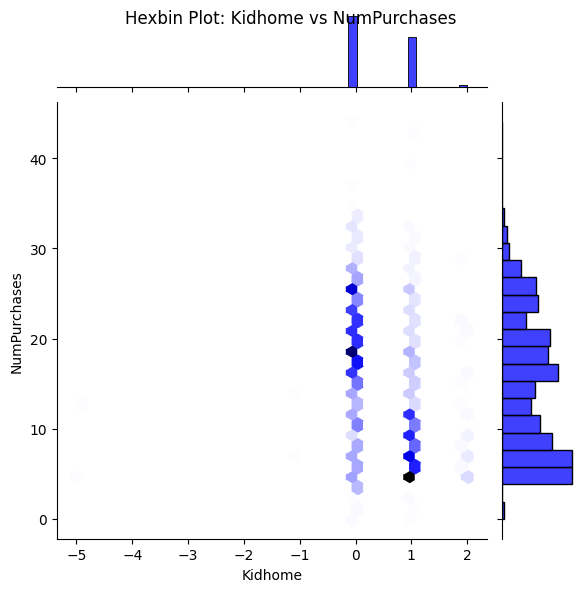

<Figure size 300x200 with 0 Axes>

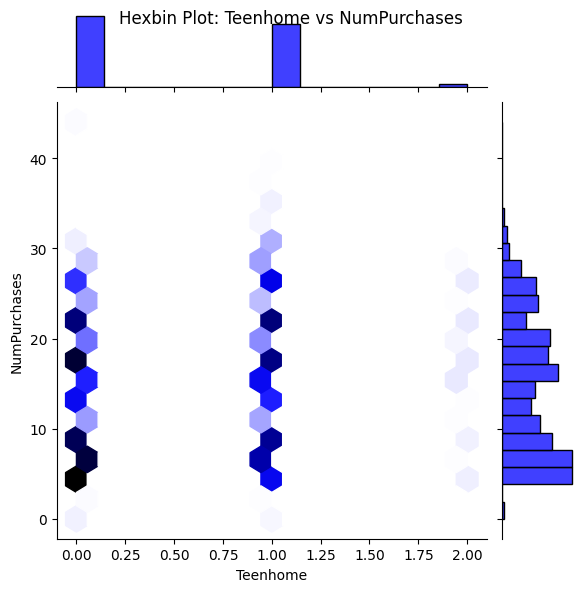

<Figure size 300x200 with 0 Axes>

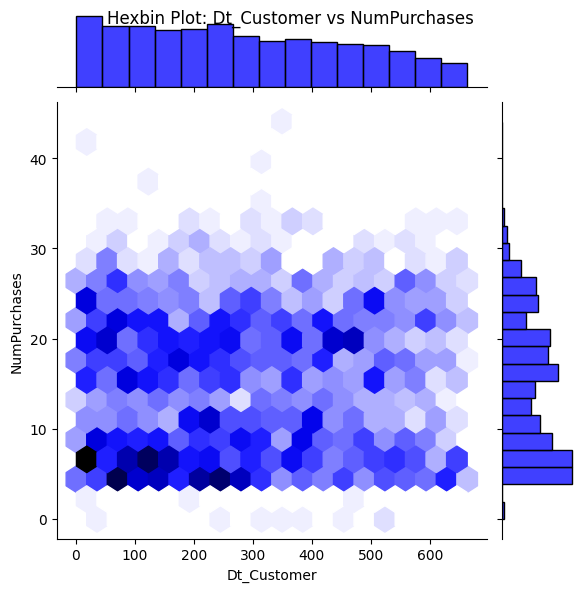

<Figure size 300x200 with 0 Axes>

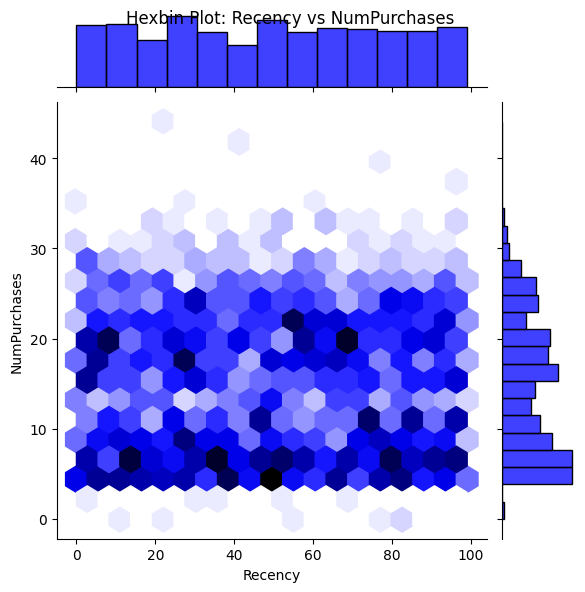

<Figure size 300x200 with 0 Axes>

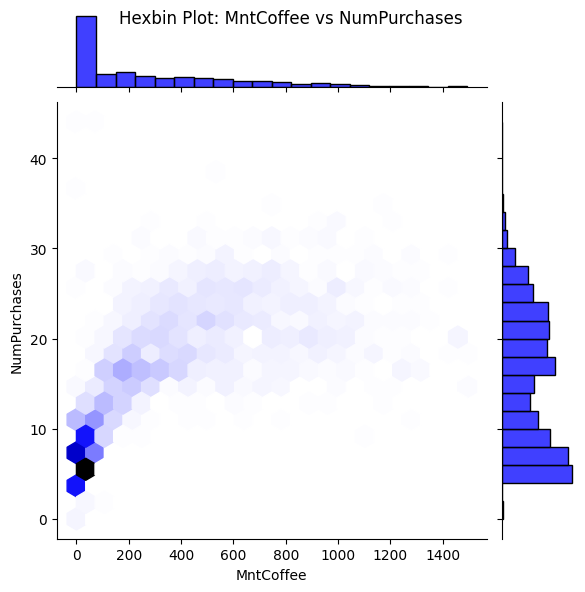

<Figure size 300x200 with 0 Axes>

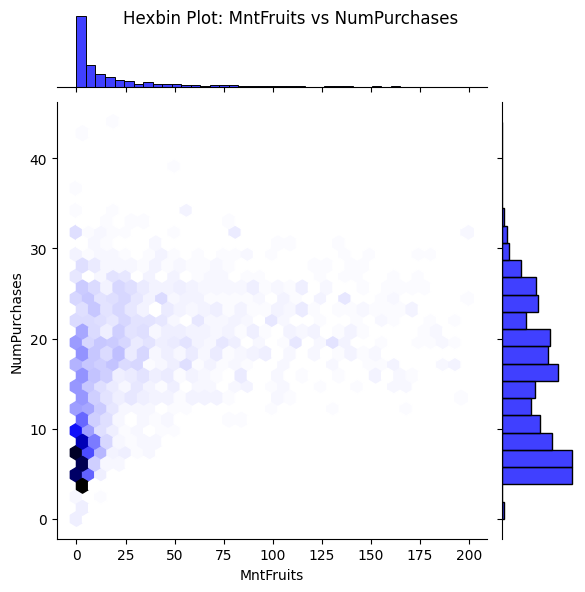

<Figure size 300x200 with 0 Axes>

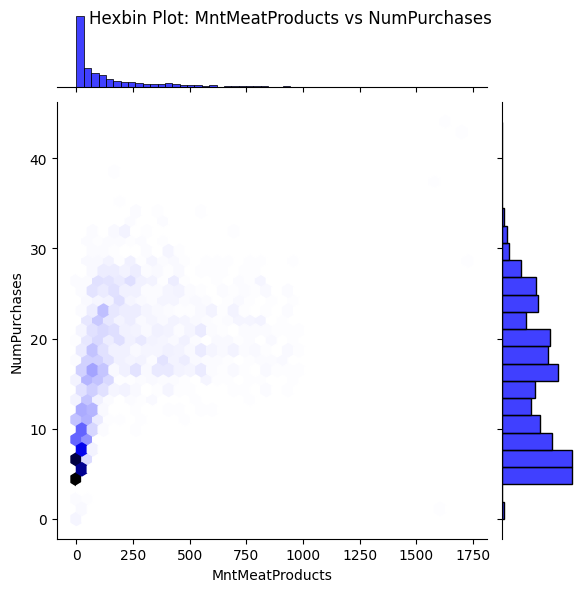

<Figure size 300x200 with 0 Axes>

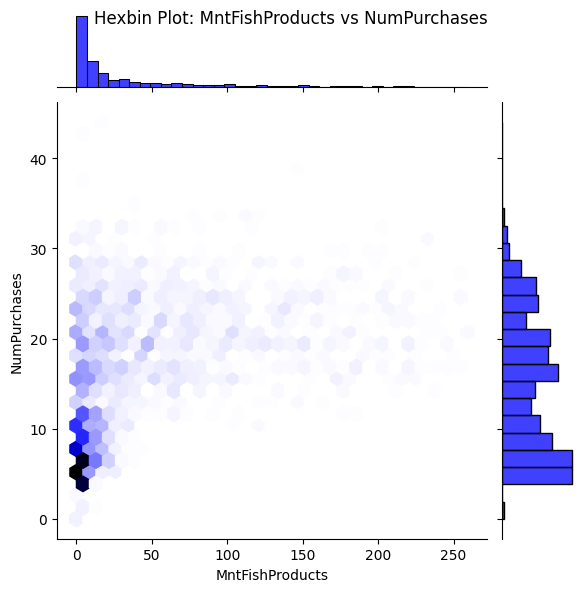

<Figure size 300x200 with 0 Axes>

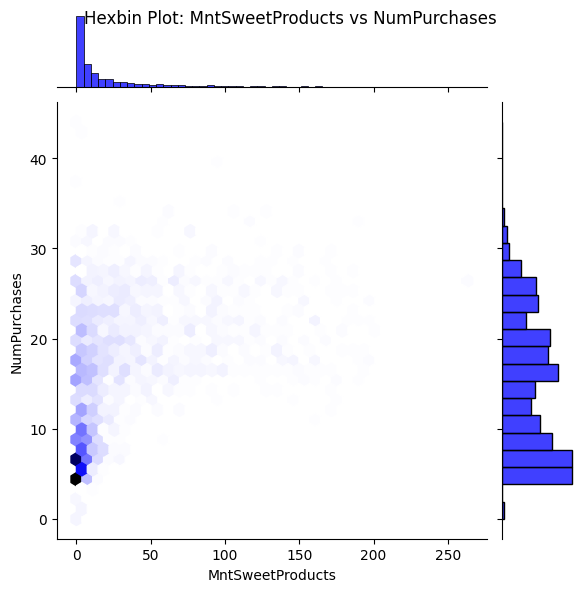

<Figure size 300x200 with 0 Axes>

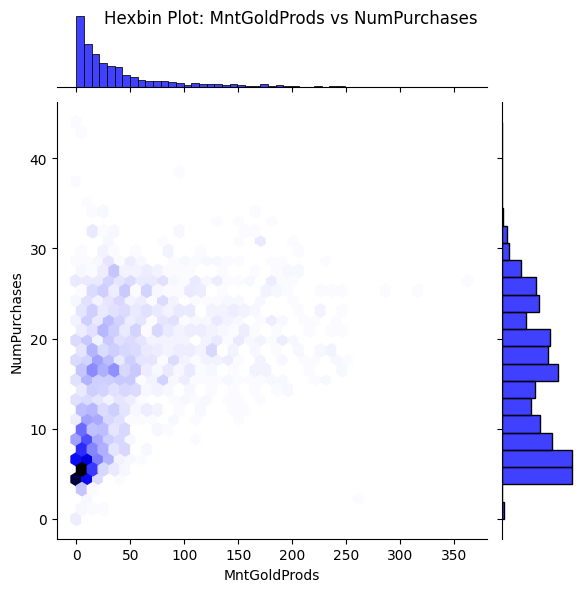

<Figure size 300x200 with 0 Axes>

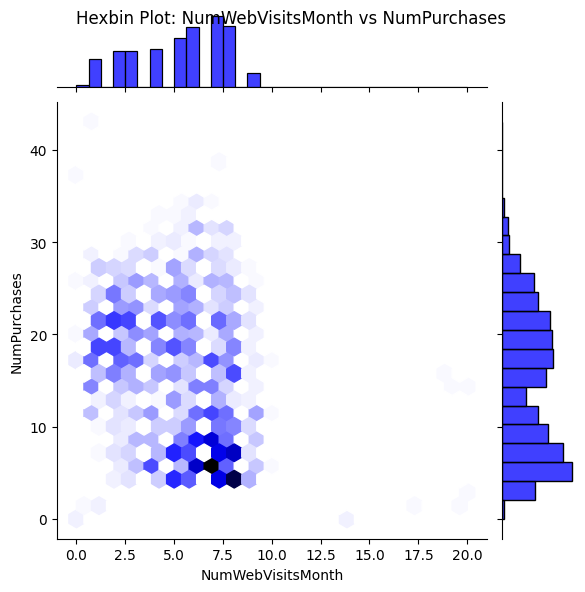

<Figure size 300x200 with 0 Axes>

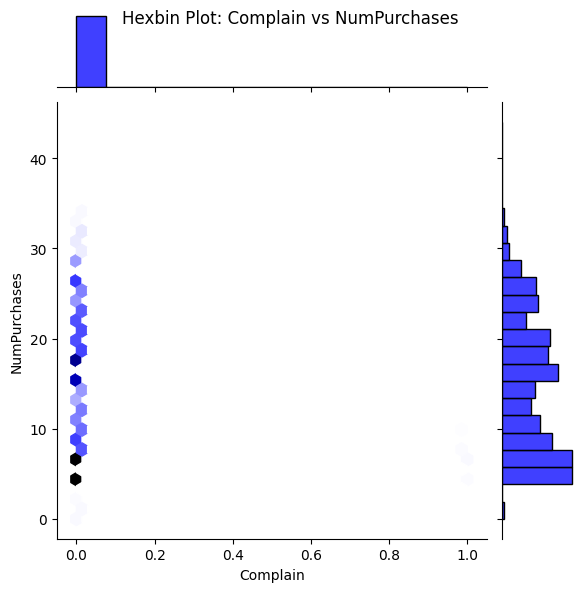

<Figure size 300x200 with 0 Axes>

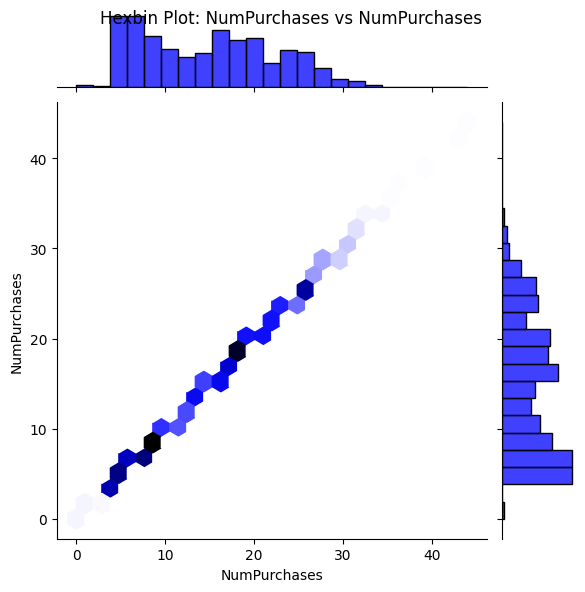

<Figure size 300x200 with 0 Axes>

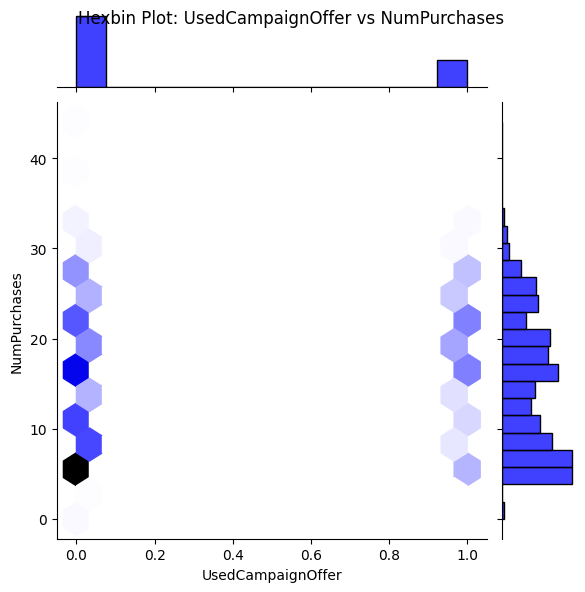

In [176]:
# Create hexbin plots
for feature in selected_features:
    plt.figure(figsize=(3, 2))
    sns.jointplot(x=df[feature], y=df['NumPurchases'], kind='hex', color='blue')
    plt.suptitle(f'Hexbin Plot: {feature} vs NumPurchases')
    plt.show()

In [177]:
columns_with_missing_values = df.columns[df.isnull().any()].tolist()

#### Fill missing values with mean:
##### Pros:
-Retains the column and its information.<br>
-Can be effective if the missing values are not spread across a large portion of the column.<br>
##### Cons:
-Imputation might introduce bias if the missing values are not missing completely at random.<br>

In [178]:
for column in columns_with_missing_values:
    df[column].fillna(df[column].mean(), inplace=True)


In [179]:
columns_with_missing_values = df.columns[df.isnull().any()].tolist()
print(columns_with_missing_values)

[]


#### Drop the entire column with missing values:

##### Pros:
-Simple and straightforward.<br>
-Eliminates the missing values from the dataset.<br>
##### Cons:
-Loss of potentially valuable information if the column contains important data.<br>
-It might not be suitable if the column is essential for your analysis.

### convert the data in range 0 to 1:

In [181]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

print(df)

      Unnamed: 0        ID  Year_Birth  Education  Marital_Status    Income  \
0       0.000000  0.493611    0.621359       0.00        0.000000  0.083844   
1       0.000447  0.194263    0.592233       0.00        0.000000  0.066088   
2       0.000893  0.370029    0.699029       0.00        0.142857  0.104131   
3       0.001340  0.552408    0.883495       0.00        0.142857  0.036432   
4       0.001787  0.475739    0.854369       0.25        0.285714  0.084078   
...          ...       ...         ...        ...             ...       ...   
2235    0.998213  0.971316    0.718447       0.00        0.285714  0.088489   
2236    0.998660  0.357519    0.514563       0.25        0.142857  0.092691   
2237    0.999107  0.649629    0.854369       0.00        0.428571  0.082102   
2238    0.999553  0.735859    0.611650       0.50        0.142857  0.100566   
2239    1.000000  0.840407    0.592233       0.25        0.285714  0.075912   

       Kidhome  Teenhome  Dt_Customer   Recency  Mn

In [182]:
y = df['NumPurchases']
X = df.drop('NumPurchases', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Validation Set:
The validation set is used to fine-tune the model and select the best hyperparameters. After training the model on the training set, it is evaluated on the validation set to assess its performance. This process is often called model selection or hyperparameter tuning.<br>
The validation set is smaller than the training set but still significant (e.g., 10-20% of the data).<br>
And its evaluate the model on the validation set to select the best hyperparameters and prevent overfitting.<br>

### K-Fold Cross-Validation
K-Fold Cross-Validation is a technique used to assess the performance and generalization ability of a machine learning model. It involves dividing the dataset into K subsets or folds, using K-1 folds for training the model, and the remaining one fold for validation. This process is repeated K times, each time using a different fold as the validation set. The performance metrics are then averaged over the K iterations to provide a more robust evaluation.

---------------------------------------------------------------------------------------------------------------------------------------------------------

# Linear Regression

Main form of simple linear regression function:
$$f(x) = \alpha x + \beta$$

here we want to find the bias ($\alpha$) and slope($\beta$) by minimizing the derivation of the Residual Sum of Squares (RSS) function:

- step 1: Compute RSS of the training data  

$$ RSS = \Sigma (y_i - (\hat{\beta} + \hat{\alpha} * x_i) )^2 $$

- step 2: Compute the derivatives of the RSS function in terms of $\alpha$ and $\beta$, and set them equal to 0 to find the desired parameters

$$ \frac{\partial RSS}{\partial \beta} = \Sigma (-f(x_i) + \hat{\beta} + \hat{\alpha} * x_i) = 0$$
$$ \to \beta = \hat{y} - \hat{\alpha} \hat{x} \to (1)$$


$$ \frac{\partial RSS}{\partial \alpha} = \Sigma (-2 x_i y_i + 2 \hat{\beta} x_i + 2\hat{\alpha} x_i ^ 2) = 0 \to (2)$$

$$ (1) , (2) \to \hat{\alpha} = \frac{\Sigma{(x_i - \hat{x})(y_i - \hat{y})}}{\Sigma{(x_i - \hat{x})^2}}
$$
$$ \hat{\beta} = y - \hat{a} x$$



Based on the above formula, implement the function below to compute the parameters of a simple linear regression

In [221]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [214]:
def simple_linear_regression(input_feature, output):
    
    x_mean = input_feature.mean()
    y_mean = output.mean()

    numerator = ((input_feature - x_mean) * (output - y_mean)).sum()
    denominator = ((input_feature - x_mean) ** 2).sum()

    slope = numerator / denominator
    intercept = y_mean - slope * x_mean

    return intercept, slope

Now complete this `get_regression_predictions(...)` function to predict the value of given data based on the calculated intercept and slope

In [215]:
def get_regression_predictions(input_feature, intercept, slope):
    predictions = intercept + slope * input_feature
    return predictions

Now that we have a model and can make predictions, let's evaluate our model using Root Mean Square Error (RMSE). RMSE is the square root of the mean of the squared differences between the residuals, and the residuals is just a fancy word for the difference between the predicted output and the true output.

Complete the following function to compute the RSME of a simple linear regression model given the input_feature, output, intercept and slope:

In [216]:
def get_root_mean_square_error(predicted_values, outputs):
    squared_diff = (predicted_values - outputs) ** 2
    mse = np.mean(squared_diff)
    rmse = np.sqrt(mse)
    return rmse

The RMSE has no bound, thus it becomes challenging to determine whether a particular RMSE value is considered good or bad without any reference point. Instead, we use R2 score. The R2 score is calculated by comparing the sum of the squared differences between the actual and predicted values of the dependent variable to the total sum of squared differences between the actual and mean values of the dependent variable. The R2 score is formulated as below:

$$R^2 = 1 - \frac{SSres}{SStot} = 1 - \frac{\sum_{i=1}^{n} (y_{i,true} - y_{i,pred})^2}{\sum_{i=1}^{n} (y_{i,true} - \bar{y}_{true})^2} $$

Complete the following function to calculate the R2 score of a given input_feature, output, bias, and slope:

In [217]:
def get_r2_score(predicted_values, outputs):
    total_ssd = np.sum((outputs - np.mean(outputs))**2)
    rss = np.sum((outputs - predicted_values)**2)
    r2_score = 1 - (rss / total_ssd)
    return r2_score

Now calculate the fitness of the model.
Remember to provide explanation for the outputs in your code!

In [241]:
X = df[['Income']]
y = df['NumPurchases']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

intercept, slope = simple_linear_regression(X_train, y_train)
predictions = get_regression_predictions(X_test, intercept, slope)

predictions = model.predict(X_test)
rmse = get_root_mean_square_error(predictions, y_test)
r2 = get_r2_score(predictions, y_test)


print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])
print("Root Mean Square Error (RMSE):", rmse)
print("R2 Score:", r2)
# print(f'Intercept (alpha): {intercept}')
# print(f'Slope (beta): {slope}')
# print("Intercept (Bias):", intercept)
# print("Slope:", slope)

Intercept: 0.15392114648104735
Slope: 2.4163115469607477
Root Mean Square Error (RMSE): 0.13971271261098203
R2 Score: 0.3312848890070783


In [242]:
X = df[['MntCoffee']]
y = df['NumPurchases']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

intercept, slope = simple_linear_regression(X_train, y_train)
predictions = get_regression_predictions(X_test, intercept, slope)

predictions = model.predict(X_test)
rmse = get_root_mean_square_error(predictions, y_test)
r2 = get_r2_score(predictions, y_test)


print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])
print("Root Mean Square Error (RMSE):", rmse)
print("R2 Score:", r2)

Intercept: 0.224203290470345
Slope: 0.5563713750589023
Root Mean Square Error (RMSE): 0.12343874171221336
R2 Score: 0.47799788877254334


In [243]:
X = df[['MntMeatProducts']]
y = df['NumPurchases']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

intercept, slope = simple_linear_regression(X_train, y_train)
predictions = get_regression_predictions(X_test, intercept, slope)

predictions = model.predict(X_test)
rmse = get_root_mean_square_error(predictions, y_test)
r2 = get_r2_score(predictions, y_test)


print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])
print("Root Mean Square Error (RMSE):", rmse)
print("R2 Score:", r2)

Intercept: 0.26344488765337837
Slope: 0.7342212483749984
Root Mean Square Error (RMSE): 0.14482050751474984
R2 Score: 0.28149562382265725


In [245]:
X = df[['Kidhome']]
y = df['NumPurchases']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

intercept, slope = simple_linear_regression(X_train, y_train)
predictions = get_regression_predictions(X_test, intercept, slope)

predictions = model.predict(X_test)
rmse = get_root_mean_square_error(predictions, y_test)
r2 = get_r2_score(predictions, y_test)


print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])
print("Root Mean Square Error (RMSE):", rmse)
print("R2 Score:", r2)

Intercept: 1.0978826630029235
Slope: -0.9804961259767762
Root Mean Square Error (RMSE): 0.15778374204408444
R2 Score: 0.14710849096933087


### Mean Squared Error (MSE):
Description: MSE is the average of the squared differences between the observed and predicted values. It penalizes larger errors more heavily. MSE is commonly used in regression problems.
### Root Mean Squared Error (RMSE):
Description: RMSE is the square root of the MSE. It represents the standard deviation of the residuals, providing a measure of the spread of errors. Like MSE, lower values of RMSE indicate better model performance.
### Residual Sum of Squares (RSS):
RSS is the sum of the squared residuals, where each residual is the difference between the observed (yi) and predicted (y^i) values. It quantifies the total error of the model on the dataset.
### R-squared (R2) Score:
Description: R2 score is a measure of the proportion of variance in the dependent variable that is predictable from the independent variable(s). It ranges from 0 to 1, with 1 indicating a perfect fit. It is often interpreted as the percentage of variation in the target variable explained by the model.<br><br>


#### Interpretation:

<b>MSE and RMSE:</b> Smaller values are better. They represent the average squared difference between predicted and actual values.<br>
<b>RSS:</b> Smaller values are better. It represents the total squared difference between predicted and actual values.<br>
<b>R2 Score:</b> Closer to 1 is better. It represents the proportion of variance explained by the model.<br>


# Multiple Regression

Multiple regression is a statistical technique that aims to model the relationship between a dependent variable and two or more independent variables.

Multiple regression with n independent variables is expressed as follows:

$$f(x) = \beta _{0} + \beta_{1} x_{1} + \beta_{2} x_{2} + \beta_{3} x_{3} + \beta_{4} x_{4} + ... + \beta_{n} x_{n} + c $$

To optimize the model for accurate predictions, multiple regression commonly employs iterative algorithms such as gradient descent.

The main goal of the optimization process is to make our predictions as close as possible to the actual values.
We measure the prediction error using a cost function, usually denoted as $J(\beta)$.

$$ J(\beta)= \frac {1}{2m} Σ_{i=0}^{m-1}(y_i - (\hat \beta _{0} + \hat \beta_{1} x_{1} + \hat \beta_{2} x_{2} + \hat \beta_{3} x_{3} + \hat \beta_{4} x_{4} + ... + \hat \beta_{n} x_{n}) )^2  $$

Gradient descent iteratively adjusts the coefficients $(\beta_i)$ to minimize the cost function. The update rule for each coefficient is:

$$\beta_{i} = \beta _ {i} - \alpha \frac {∂J(\beta)}{∂\beta_{i}}$$

$$ \frac {∂J(\beta)}{∂\beta_{i}} = \frac {1}{m}Σ_{j=0}^{m-1}(y_j - (\hat \beta _{0} + \hat \beta_{1} x_{j1} + \hat \beta_{2} x_{j2} + \hat \beta_{3} x_{j3} + \hat \beta_{4} x_{j4} + ... + \hat \beta_{n} x_{jn})) x_{ji} $$



## Predicting output given regression weights

Based on the formula above and [np.dot()](https://numpy.org/doc/stable/reference/generated/numpy.dot.html) method, complete this function to compute the predictions for an entire matrix of features given the matrix, bias, and the weights. Provide an explanation of np.dot method and the reasoning behind using this method in your code:

In [145]:
def predict_output(feature_matrix, weights, bias):
    predictions = np.dot(feature_matrix, weights) + bias
    return predictions

## Computing the Derivative

As we saw, the cost function is the sum over the data points of the squared difference between an observed output and a predicted output.

Since the derivative of a sum is the sum of the derivatives, we can compute the derivative for a single data point and then sum over data points. We can write the squared difference between the observed output and predicted output for a single point as follows:

$$
(output  - (const* w _{0} + [feature_1] * w_{1} + ...+ [feature_n] * w_{n}  ))^2
$$

With n feautures and a const , So the derivative will be :


$$
2 * (output  - (const* w _{0} + [feature_1] * w_{1} + ...+ [feature_n] * w_{n}  ))
$$

The term inside the paranethesis is just the error (difference between prediction and output). So we can re-write this as:

$$2 * error*[feature_i] $$


That is, the derivative for the weight for feature i is the sum (over data points) of 2 times the product of the error and the feature itself. In the case of the constant then this is just twice the sum of the errors!

Recall that twice the sum of the product of two vectors is just twice the dot product of the two vectors. Therefore the derivative for the weight for feature_i is just two times the dot product between the values of feature_i and the current errors.


With this in mind, complete the following derivative function which computes the derivative of the weight given the value of the feature (over all data points) and the errors (over all data points).


In [146]:
def feature_derivative(errors, feature):
    derivative = 2 * np.dot(errors, feature)
    return derivative

## Gradient Descent

Now we will write a function that performs a gradient descent. The basic premise is simple. Given a starting point we update the current weights by moving in the negative gradient direction. Recall that the gradient is the direction of increase and therefore the negative gradient is the direction of decrease and we're trying to minimize a cost function.


The amount by which we move in the negative gradient direction is called the 'step size'. We stop when we are 'sufficiently close' to the optimum. We define this by requiring that the magnitude (length) of the gradient vector to be smaller than a fixed 'tolerance'.


With this in mind, complete the following gradient descent function below using your derivative function above. For each step in the gradient descent we update the weight for each feature befofe computing our stopping criteria.

In [ ]:
y = df['NumPurchases']
X = df.drop('NumPurchases', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [147]:
def regression_gradient_descent(feature_matrix, outputs, initial_weights, bias, step_size, tolerance):
    weights = np.array(initial_weights)
    coincide = False
    while not coincide:
        predictions = predict_output(feature_matrix, weights, bias)
        errors = outputs - predictions

        gradient = - feature_derivative(feature_matrix.T, errors)
        weights -= step_size * gradient

        bias_gradient = -2 * np.sum(errors)
        bias -= step_size * bias_gradient

        if np.linalg.norm(gradient) < tolerance:
            coincide = True

    return weights, bias

In [148]:
def normalize_features(chosen_features, data_frame):
    for feature in chosen_features:
        data_frame[feature] = (data_frame[feature] - data_frame[feature].mean()) / data_frame[feature].std()
    return data_frame


def n_feature_regression(chosen_feature_matrix, target_matrix, keywords):
    initial_weights = keywords['initial_weights']
    step_size = keywords['step_size']
    tolerance = keywords['tolerance']
    bias = keywords['bias']
    
    weights, bias = regression_gradient_descent(chosen_feature_matrix, target_matrix, initial_weights, bias, step_size, tolerance)
    return weights, bias

def get_weights_and_bias(chosen_features):
    keywords = {
        'initial_weights': np.array([.5]*len(chosen_features)),
        'step_size': 1.e-4,
        'tolerance': 1.e-10,
        'bias': 0
    }
    chosen_feature_dataframe = trainData[chosen_features]
    chosen_feature_matrix = chosen_feature_dataframe.to_numpy()

    target_column = trainData[target]
    target_matrix = target_column.to_numpy()

    train_weights, bias = n_feature_regression(chosen_feature_matrix, target_matrix, keywords)

    return chosen_feature_matrix, train_weights, bias

## Two Feature Regression

In this part, you should choose 2 features and implement multiple regression on them :

In [152]:
# ToDo
# compute the chosen_feature_matrix, train_weights, and bias
chosen_features = ['MntCoffee', 'Income']

chosen_feature_dataframe = X_train[chosen_features]
chosen_feature_matrix = chosen_feature_dataframe.to_numpy()

target_column = y_train
target_matrix = target_column.to_numpy()

keywords = {
    'initial_weights': np.array([.5] * len(chosen_features)),
    'step_size': 1.e-4,
    'tolerance': 1.e-10,
    'bias': 0
}

train_weights, bias = n_feature_regression(chosen_feature_matrix, target_matrix, keywords)


In [153]:
#ToDo
# compute the predictions
predictions = predict_output(chosen_feature_matrix, train_weights, bias)

In [158]:
r2_result = get_r2_score(target_matrix, predictions)
mse_result = get_root_mean_square_error(target_matrix, predictions)

print(f'R2 Score: {r2_result}')
print(f'Mean Squared Error: {mse_result}')


R2 Score: 0.03616408141380245
Mean Squared Error: 0.1227290427527668


## Three Feature Regression

Now repeat the steps for 3 features

In [160]:
chosen_features = ['MntCoffee', 'Income', 'MntMeatProducts']

chosen_feature_dataframe = X_train[chosen_features]
chosen_feature_matrix = chosen_feature_dataframe.to_numpy()

target_column = y_train
target_matrix = target_column.to_numpy()

keywords = {
    'initial_weights': np.array([.5] * len(chosen_features)),
    'step_size': 1.e-4,
    'tolerance': 1.e-10,
    'bias': 0
}

train_weights, bias = n_feature_regression(chosen_feature_matrix, target_matrix, keywords)

predictions = predict_output(chosen_feature_matrix, train_weights, bias)

r2_result = get_r2_score(target_matrix, predictions)
mse_result = get_root_mean_square_error(target_matrix, predictions)

print(f'R2 Score: {r2_result}')
print(f'Mean Squared Error: {mse_result}')


R2 Score: 0.13170907003178078
Mean Squared Error: 0.11942871857129432


## Five Feature Regression

Finally, repeat the steps for 5 features

Explain the differences in the results and the reasoning behind these variations.

In [161]:
chosen_features = ['MntCoffee', 'Income', 'MntMeatProducts', 'MntGoldProds', 'MntSweetProducts']

chosen_feature_dataframe = X_train[chosen_features]
chosen_feature_matrix = chosen_feature_dataframe.to_numpy()

target_column = y_train
target_matrix = target_column.to_numpy()

keywords = {
    'initial_weights': np.array([.5] * len(chosen_features)),
    'step_size': 1.e-4,
    'tolerance': 1.e-10,
    'bias': 0
}

train_weights, bias = n_feature_regression(chosen_feature_matrix, target_matrix, keywords)

predictions = predict_output(chosen_feature_matrix, train_weights, bias)

r2_result = get_r2_score(target_matrix, predictions)
mse_result = get_root_mean_square_error(target_matrix, predictions)

print(f'R2 Score: {r2_result}')
print(f'Mean Squared Error: {mse_result}')


R2 Score: 0.3175470761490272
Mean Squared Error: 0.11157407158881943


# Classification

In [29]:
median_purchase = df['NumPurchases'].median()
df['PurchaseRate'] = df['NumPurchases'].apply(lambda x: 'HIGH' if x > median_purchase else 'LOW')

In [30]:
X = df.drop(['NumPurchases', 'PurchaseRate'], axis=1)
y = df['PurchaseRate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Model 1: K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

In [32]:
# Model 2: Decision Trees
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

In [33]:
# Model 3: Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

In [34]:
def evaluate_model(model_name, predictions, y_true):
    accuracy = accuracy_score(y_true, predictions)
    cm = confusion_matrix(y_true, predictions)
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(f"{model_name} Confusion Matrix:\n", cm)
    print()

evaluate_model("K-Nearest Neighbors", knn_predictions, y_test)
evaluate_model("Decision Trees", dt_predictions, y_test)
evaluate_model("Logistic Regression", lr_predictions, y_test)

K-Nearest Neighbors Accuracy: 0.8147
K-Nearest Neighbors Confusion Matrix:
 [[180  56]
 [ 27 185]]

Decision Trees Accuracy: 0.8705
Decision Trees Confusion Matrix:
 [[211  25]
 [ 33 179]]

Logistic Regression Accuracy: 0.8571
Logistic Regression Confusion Matrix:
 [[194  42]
 [ 22 190]]



The GridSearchCV method is a hyperparameter tuning technique provided by scikit-learn. It systematically searches through a specified hyperparameter grid, evaluates the model's performance using cross-validation, and identifies the best combination of hyperparameters<br>
GridSearchCV automates the process of hyperparameter tuning, helping you find the optimal configuration for your model by systematically testing different combinations.

In [35]:
model = RandomForestClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)
print("Best Model:", best_model)

test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy with Best Model:", test_accuracy)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Model: RandomForestClassifier(min_samples_split=5, n_estimators=200)
Test Accuracy with Best Model: 0.921875


#### Overfitting
Overfitting occurs when the model tries to model the noises in the data and loses the ability to generalize and makes a very meandering curve.
To avoid that information gain, we compare an attribute with a random state, if the difference is small, there is no need to divide it.<br>
It's occurs when a model is too complex and learns the training data too well, capturing noise or random fluctuations.
#### Underfitting
Underfitting occurs when a model is too simple to capture the underlying patterns in the data.
The model performs poorly on both the training and testing datasets.
It fails to learn the underlying patterns and exhibits high bias.

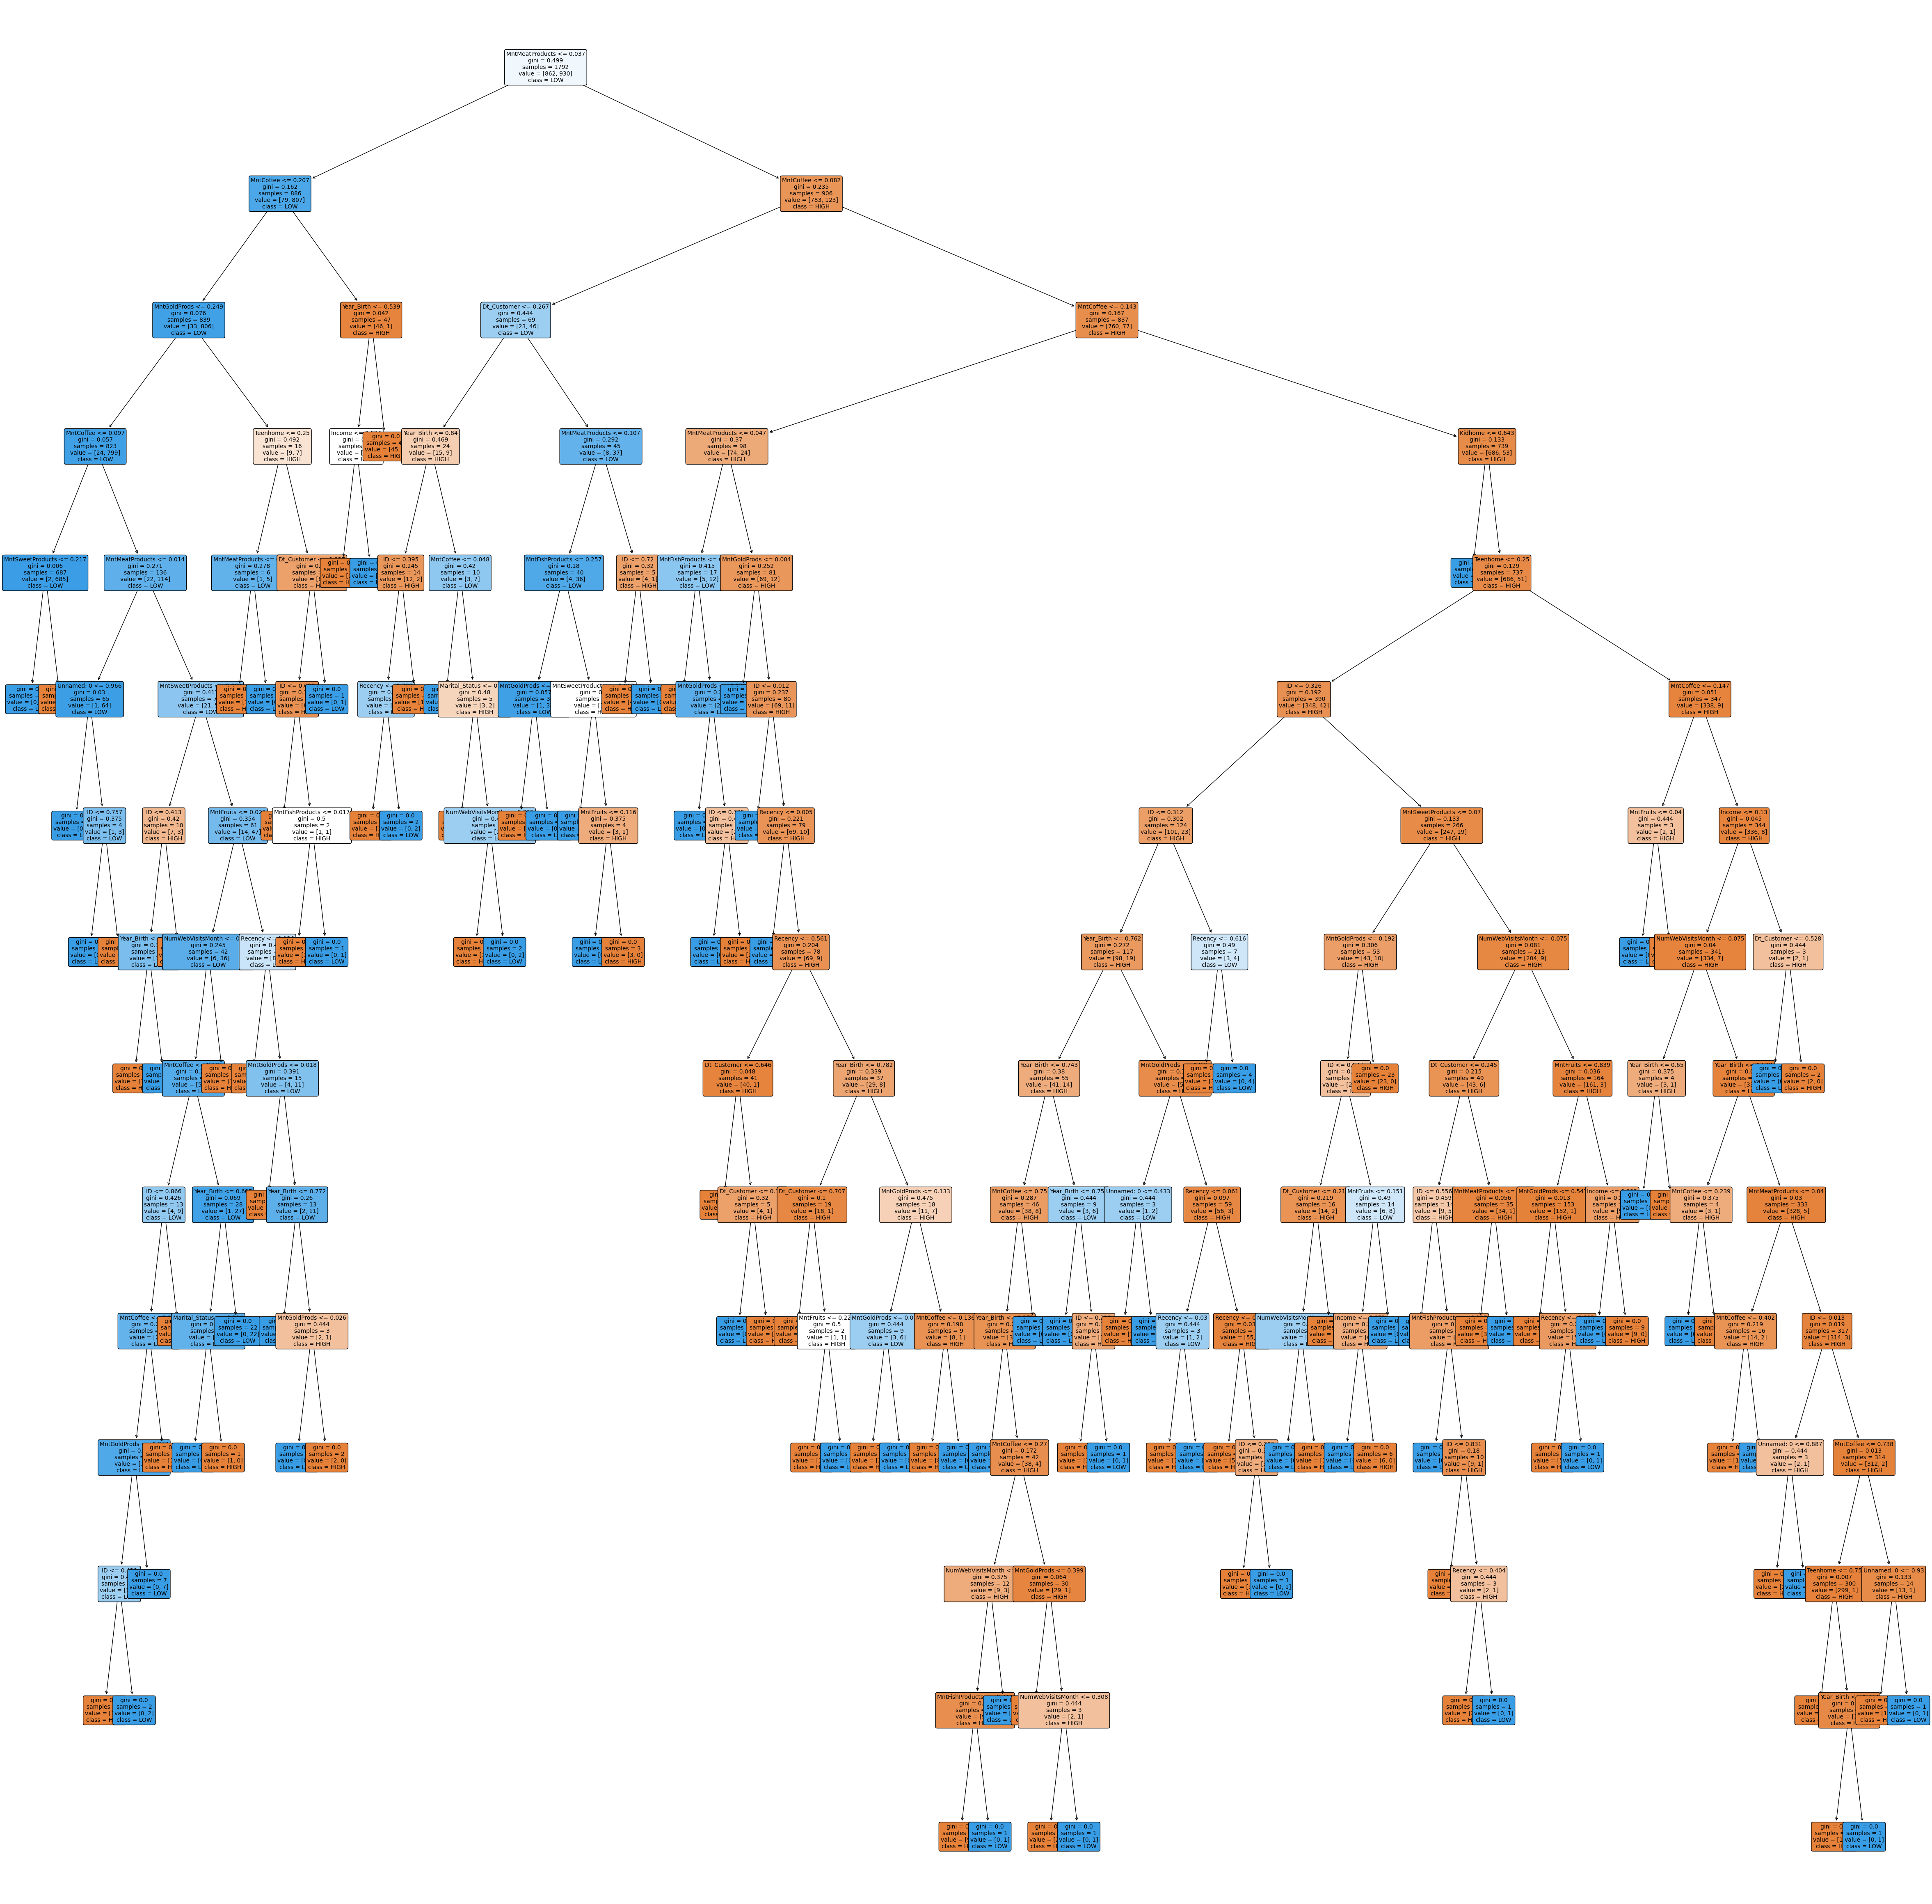

In [53]:
plt.figure(figsize=(60, 60))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=dt_model.classes_, rounded=True, fontsize=10)
plt.show()

### 24:

#### Effect of n_estimators:
The 'n_estimators' parameter determines the number of decision trees in the forest. Increasing the number of trees generally improves the model's performance up to a certain point. Beyond that point, adding more trees might not significantly improve the results but could increase computational cost.
#### Effect of max_depth:
The max_depth parameter controls the maximum depth of each decision tree. A deeper tree can capture more intricate patterns in the data but may lead to overfitting.

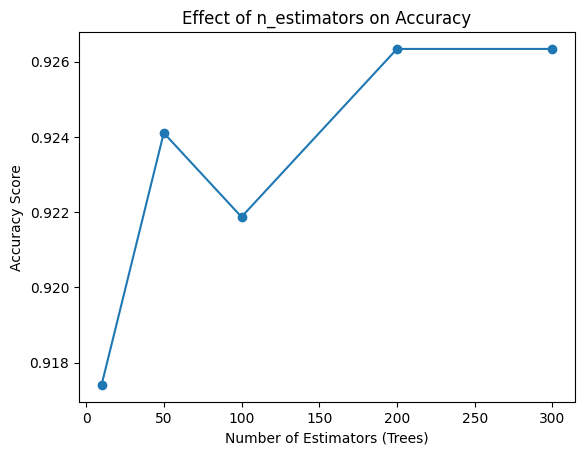

In [42]:
# n_estimators
n_estimators_range = [10, 50, 100, 200, 300]
accuracy_scores = []

for n_estimators in n_estimators_range:
    rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

plt.plot(n_estimators_range, accuracy_scores, marker='o')
plt.title('Effect of n_estimators on Accuracy')
plt.xlabel('Number of Estimators (Trees)')
plt.ylabel('Accuracy Score')
plt.show()


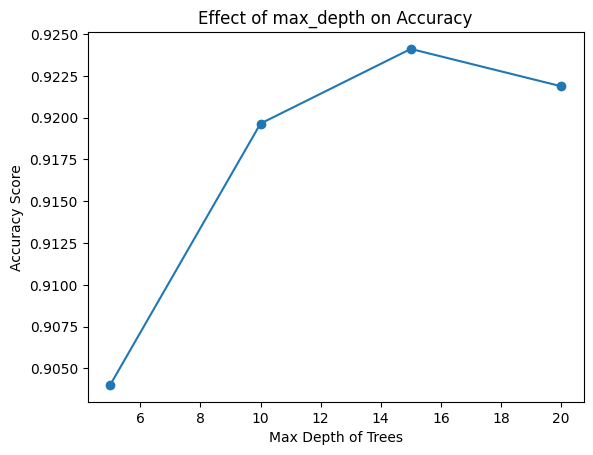

In [40]:
# max_depth
max_depth_range = [None, 5, 10, 15, 20]
accuracy_scores_max_depth = []

for max_depth in max_depth_range:
    rf_model = RandomForestClassifier(n_estimators=100, max_depth=max_depth, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores_max_depth.append(accuracy)

plt.plot(max_depth_range, accuracy_scores_max_depth, marker='o')
plt.title('Effect of max_depth on Accuracy')
plt.xlabel('Max Depth of Trees')
plt.ylabel('Accuracy Score')
plt.show()


#### Bias:
* Definition: Bias refers to the error introduced by approximating a real-world problem, which may be complex, by a simplified model. It represents the difference between the predicted output and the true output.
    * High bias models are too simple and may not capture the underlying patterns in the data.

#### Variance:
* Definition: Variance measures the model's sensitivity to the specific noise in the training data. It represents the amount by which the model's predictions would change if it were trained on a different dataset.
    * High variance models are too complex and may fit the training data too closely.
    * They tend to capture noise and fluctuations in the training data.

 **Decision Tree vs. Random Forest:**
   - **Decision Tree:**
     - **Bias:** Decision trees can have high bias if they are too simple (e.g., shallow trees). They might struggle to capture complex relationships in the data.
     - **Variance:** Decision trees can have high variance, especially if they are deep. Deep trees may fit the training data too closely, leading to overfitting.

   - **Random Forest:**
     - **Bias:** Random Forests tend to have lower bias compared to individual decision trees. The ensemble nature allows them to capture more complex patterns.
     - **Variance:** Random Forests generally have lower variance compared to individual decision trees. The ensemble averages out the noise and reduces the risk of overfitting.

 **Comparison:**
   - Decision trees can suffer from either high bias (if too simple) or high variance (if too complex).
   - Random Forests are designed to mitigate the variance issue by aggregating multiple decision trees. They often provide a better balance between bias and variance.

 **Conclusion:**
   - In terms of bias and variance, a well-tuned Random Forest model is likely to perform better than an individual decision tree.
   - Random Forests offer the advantages of reducing overfitting and improving generalization to new data by aggregating multiple trees.

<br>-Eventualy it's work as I expeted

### 26:

* Adding noise makes it more challenging to identify individuals within the dataset.
*  By introducing randomness, the uniqueness of individual records is obscured, making it harder to link specific data points to identifiable individuals.
*  Noise can help protect sensitive attributes within the dataset.
*  Perturbing specific attributes makes it more difficult to deduce sensitive information, preserving the confidentiality of individual attributes.

### 27:


**Laplace Noise:**
* Probability Distribution: Laplace Distribution: Laplace noise follows a Laplace probability distribution.
* Formula: The probability density function (PDF) of Laplace distribution is given by:
* Mean and Scale: μ is the mean, and b is the scale parameter.
* Laplace noise is symmetric around its mean.

**Exponential Noise:**
* Probability Distribution:
* Exponential Distribution: Exponential noise follows an exponential probability distribution.
* Formula: The probability density function (PDF) of the exponential distribution is given.
* λ is the rate parameter, and it is the inverse of the scale parameter in the exponential distribution.


Summary of Differences:
* 		Symmetry:
    * Laplace: Symmetric around its mean.
    * Exponential: Asymmetric.
* 		Tail Behavior:
    * Laplace: Heavy-tailed.
    * Exponential: Single, long tail.
* 		Parameter Interpretation:
    * Laplace: b controls the spread of the distribution.
    * Exponential: λ controls the rate of decay.
* 		Application:
    * Laplace: Commonly used in differential privacy mechanisms.
    * Exponential: Also used in privacy-preserving methods; known for its use in generating noise for privacy.

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

epsilon = 0.1  # Privacy parameter controlling the amount of noise
laplace_noise = np.random.laplace(loc=0, scale=epsilon, size=X_train.shape)

X_train_with_noise = X_train + laplace_noise

classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train_with_noise, y_train)

X_test_with_noise = X_test + np.random.laplace(loc=0, scale=epsilon, size=X_test.shape)
y_pred = classifier.predict(X_test_with_noise)

accuracy_with_noise = accuracy_score(y_test, y_pred)

print("Accuracy with Laplace noise:", accuracy_with_noise)

Accuracy with Laplace noise: 0.8303571428571429


Here I choose **'Laplace noise'** as the method to add noise to the dataset. <br>
Duo to adding noise to protect privacy, as the results show, the accuracy of the model and predictive performance <b>decreased</b>.

### 29:

Gradient Boosting is an ensemble learning method that builds an ensemble of weak learners (usually decision trees) sequentially to improve overall predictive performance. Decision trees, on the other hand, are standalone models that may be prone to overfitting and are trained independently. The key distinction lies in the iterative, corrective nature of Gradient Boosting compared to the standalone nature of decision trees.

### 30:

XGBoost, short for eXtreme Gradient Boosting, is an advanced and highly efficient machine learning algorithm based on the gradient boosting framework. however, it gained significant popularity around that time due to its effectiveness in various machine learning competitions. XGBoost is known for its speed, scalability, and performance, especially in structured/tabular data scenarios. Let's dive into how the tree works in XGBoost:
<br>
* Decision Trees:
    * XGBoost builds an ensemble of decision trees, specifically gradient boosting trees.
    * Each tree is a weak learner that contributes to the overall predictive power of the model.
* Objective Function:
    * The objective function in XGBoost consists of two parts: the loss function and a regularization term.
    * The loss function measures the difference between the predicted and actual values.
    * The regularization term helps control the complexity of the model to prevent overfitting.
* Boosting Process:
    * XGBoost uses a boosting process where each new tree corrects the errors made by the existing ensemble.
    * Trees are added sequentially, and the focus is on minimizing the loss function.